# Test the VAE models

In [1]:
import numpy as np
from src.model import genModel
from src.vaeHelpers import *

%matplotlib inline

Using TensorFlow backend.


## Load model

In [2]:
codeSize = 256
imgSize  = 128
filters  = 128

valCats = readSavedFiles( "valCats.txt" )

encCat, decCat, catVAE = genModel( imgSize = imgSize, codeSize = codeSize, filters = filters )

catVAE.load_weights( "weights/catGen.hdf5" )

/home/baxter/Desktop/MLbook/catGenerator/src/model.py:96: UserWarning: Output "decoder" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "decoder" during training.
  VAE.compile( optimizer = opt, loss = None )


## Generate some cats

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


		Generated:


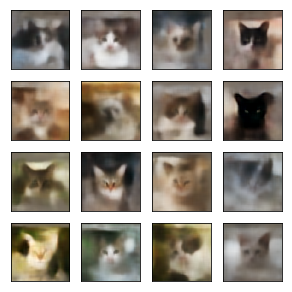

In [3]:
codes = np.random.normal( size = (16, codeSize) )
cats = decCat.predict( codes )

print( "\t\tGenerated:" )
plotGrid( cats, "", (4, 4) )

## Inspect cat reconstructions


		Original:


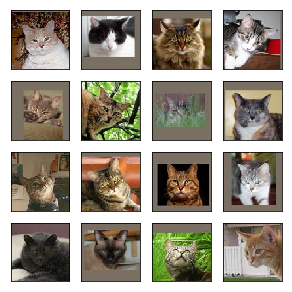

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



		Reconstruction:


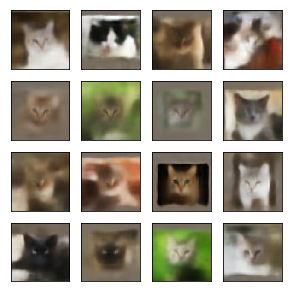

In [4]:
catSample, _ = next( genBatch( valCats, 16, imgSize, False ) )

recon = catVAE.predict( catSample )

print( "\n\t\tOriginal:" )
plotGrid( catSample, "", size = (4, 4) )

print( "\n\t\tReconstruction:" )
plotGrid( recon, "", size = (4, 4) )